# Assignment1 
### Christopher Hong

## Task 3

In [1]:
import keras
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

Using TensorFlow backend.


### Preparing the data

####  Exploratory Data Analysis

In [2]:
# Feature names of the dataset
col_names = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',\
             'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',\
             'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',\
             'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',\
             'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',\
             'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',\
             'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',\
             'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',\
             'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg',\
             'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',\
             'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly',\
             'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous',\
             'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',\
             'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',\
             'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',\
             'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent',\
             'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet',\
             'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',\
             'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',\
             'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite',\
             'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',\
             'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars',\
             'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',\
             'PolicBudgPerPop', 'ViolentCrimesPerPop']

# Dataset url
cc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

# Load the dataset using pandas
cc = pd.read_csv(cc_url, header=None, names=col_names)

In [3]:
print('Dataset shape:', cc.shape)

Dataset shape: (1994, 128)


In [4]:
cc.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [5]:
cc.tail()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19
1993,6,?,?,Ontariocity,10,0.20,0.78,0.14,0.46,0.24,...,0.11,0.30,0.05,0.08,0.04,0.73,0.5,1.00,0.13,0.48


In [6]:
cc = cc.replace({'?': np.nan, 'N/A': np.nan})

In [7]:
pd.isna(cc.iloc[:, :50]).sum()

state                  0
county              1174
community           1177
communityname          0
fold                   0
population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
agePct12t21            0
agePct12t29            0
agePct16t24            0
agePct65up             0
numbUrban              0
pctUrban               0
medIncome              0
pctWWage               0
pctWFarmSelf           0
pctWInvInc             0
pctWSocSec             0
pctWPubAsst            0
pctWRetire             0
medFamInc              0
perCapInc              0
whitePerCap            0
blackPerCap            0
indianPerCap           0
AsianPerCap            0
OtherPerCap            1
HispPerCap             0
NumUnderPov            0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
PctEmplManu            0


In [8]:
pd.isna(cc.iloc[:, 50:90]).sum()

PctYoungKids2Par       0
PctTeen2Par            0
PctWorkMomYoungKids    0
PctWorkMom             0
NumIlleg               0
PctIlleg               0
NumImmig               0
PctImmigRecent         0
PctImmigRec5           0
PctImmigRec8           0
PctImmigRec10          0
PctRecentImmig         0
PctRecImmig5           0
PctRecImmig8           0
PctRecImmig10          0
PctSpeakEnglOnly       0
PctNotSpeakEnglWell    0
PctLargHouseFam        0
PctLargHouseOccup      0
PersPerOccupHous       0
PersPerOwnOccHous      0
PersPerRentOccHous     0
PctPersOwnOccup        0
PctPersDenseHous       0
PctHousLess3BR         0
MedNumBR               0
HousVacant             0
PctHousOccup           0
PctHousOwnOcc          0
PctVacantBoarded       0
PctVacMore6Mos         0
MedYrHousBuilt         0
PctHousNoPhone         0
PctWOFullPlumb         0
OwnOccLowQuart         0
OwnOccMedVal           0
OwnOccHiQuart          0
RentLowQ               0
RentMedian             0
RentHighQ              0


In [9]:
pd.isna(cc.iloc[:, 90:]).sum()

MedRent                     0
MedRentPctHousInc           0
MedOwnCostPctInc            0
MedOwnCostPctIncNoMtg       0
NumInShelters               0
NumStreet                   0
PctForeignBorn              0
PctBornSameState            0
PctSameHouse85              0
PctSameCity85               0
PctSameState85              0
LemasSwornFT             1675
LemasSwFTPerPop          1675
LemasSwFTFieldOps        1675
LemasSwFTFieldPerPop     1675
LemasTotalReq            1675
LemasTotReqPerPop        1675
PolicReqPerOffic         1675
PolicPerPop              1675
RacialMatchCommPol       1675
PctPolicWhite            1675
PctPolicBlack            1675
PctPolicHisp             1675
PctPolicAsian            1675
PctPolicMinor            1675
OfficAssgnDrugUnits      1675
NumKindsDrugsSeiz        1675
PolicAveOTWorked         1675
LandArea                    0
PopDens                     0
PctUsePubTrans              0
PolicCars                1675
PolicOperBudg            1675
LemasPctPo

In [10]:
cc.drop(columns=['state', 'county', 'community', 'communityname', 'fold'], inplace=True)

In [11]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
cc.iloc[:,:] = imp.fit_transform(cc)

In [12]:
cc.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [13]:
cc.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.085793,0.056005,0.085459,0.162099,0.240328,0.065796,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
del cc

#### Loading the Communities and Crime dataset

In [15]:
def load_crime_data():
    """
    Load the communities and crime data from the UCI repository.
    Return a training and testing subsets.
    """
    
    np.random.seed(0)
    
    cc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

    # Load the data into DataFrame
    cc = pd.read_csv(cc_url, header=None)
    
    # Drop the first 5 columns, split the data into features and class
    X = cc.iloc[:,5:-1]
    y = cc.iloc[:,-1]
    
    # Impute missing values
    X = X.replace({'?': np.nan, 'N/A': np.nan})
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X.iloc[:,:] = imp.fit_transform(X)
    
    # Vetorization
    X = X.astype('float32')
    y = y.astype('float32')
    
    # Normalize the data
    X.iloc[:,:] = StandardScaler().fit_transform(X)
    
    # Split the data into 80/20
    x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)
    
    # Return ndarray instead of DataFrame
    return x_train, x_test, y_train, y_test

In [16]:
x_train, x_test, y_train, y_test = load_crime_data()

In [17]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1595, 122)
1595 train_samples
399 test samples


### Creating a model using the Sequential API

#### Defining a model

In [19]:
def build_model(learning_rate = 1e-3, n_hidden=2, n_neurons=128, input_shape=122):
    model = Sequential()
    for i in range(n_hidden):
        if i == 0:
            model.add(Dense(n_neurons, activation='relu', input_shape=(input_shape,)))
        else:
            model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    return model

#### Compiling the model and fit the data using K-fold cross validation

In [23]:
np.random.seed(0)
all_mae_histories = []
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in kf.split(x_train, y_train, groups=None):
    cc_model = build_model()
    history = cc_model.fit(x_train[train_index],
                           y_train[train_index],
                           epochs=100,
                           batch_size=64,
                           validation_data=(x_train[test_index], y_train[test_index]),
                           verbose=0)
    all_mae_histories.append(history.history['mae'])

In [26]:
# Credit to Deep Learning with Python book
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(100)]

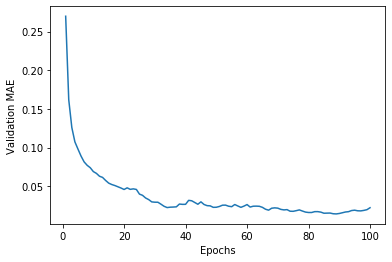

In [27]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show();

In [28]:
np.random.seed(0)

cc_model = build_model()
cc_model.fit(x_train,
             y_train,
             epochs=90,
             batch_size=64)
cc_model.evaluate(x_test, y_test)

Epoch 1/90
1595/1595 [==============================] - 0s 122us/step - loss: 0.0995 - mae: 0.2345
Epoch 2/90
1595/1595 [==============================] - 0s 67us/step - loss: 0.0456 - mae: 0.1495
Epoch 3/90
1595/1595 [==============================] - 0s 71us/step - loss: 0.0246 - mae: 0.1177
Epoch 4/90
1595/1595 [==============================] - 0s 66us/step - loss: 0.0172 - mae: 0.0969
Epoch 5/90
1595/1595 [==============================] - 0s 69us/step - loss: 0.0151 - mae: 0.0907
Epoch 6/90
1595/1595 [==============================] - 0s 62us/step - loss: 0.0130 - mae: 0.0807
Epoch 7/90
1595/1595 [==============================] - 0s 67us/step - loss: 0.0101 - mae: 0.0751
Epoch 8/90
1595/1595 [==============================] - 0s 72us/step - loss: 0.0103 - mae: 0.0753
Epoch 9/90
1595/1595 [==============================] - 0s 70us/step - loss: 0.0114 - mae: 0.0779
Epoch 10/90
1595/1595 [==============================] - 0s 60us/step - loss: 0.0111 - mae: 0.0728
Epoch 11/90
1595/1

[0.02812101696629572, 0.12394872307777405]

### Fine-tuning the model

In [31]:
# Create a KerasRegressor; Credit to Hands-On Machine Learning with Scikit-Learn, Keras, and TnsorFlow 2nd dit. book
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [35]:
np.random.seed(0)
params = {
    'learning_rate': [0.0001, 0.001, 0.1],
    'n_hidden': [2, 3, 4],
    'n_neurons': [128, 256, 512],
    'batch_size': [64, 128, 256, 512]}

# Split the train dataset into validation and train set
#partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
    
random_search_cv = RandomizedSearchCV(keras_reg, params, n_iter=10, cv=3, random_state=0)
random_search_cv.fit(x_train,
                     y_train,
                     epochs=200,
                     verbose=0)

531/531 [==============================] - 0s 59us/step


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f39b207af10>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [64, 128, 256, 512],
                                        'learning_rate': [0.0001, 0.001, 0.1],
                                        'n_hidden': [2, 3, 4],
                                        'n_neurons': [128, 256, 512]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [36]:
random_search_cv.best_params_

{'n_neurons': 256, 'n_hidden': 4, 'learning_rate': 0.001, 'batch_size': 64}

#### Rebuild and train a model using K-fold validation based on the best params of the randomizedSearch result

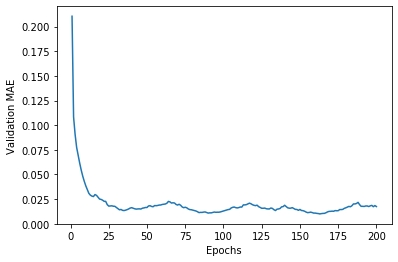

In [37]:
np.random.seed(0)
all_mae_histories = []
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in kf.split(x_train, y_train, groups=None):
    cc_model = build_model(learning_rate=1e-3, n_hidden=4, n_neurons=256)
    history = cc_model.fit(x_train[train_index],
                           y_train[train_index],
                           epochs=200,
                           batch_size=64,
                           validation_data=(x_train[test_index], y_train[test_index]),
                           verbose=0)
    all_mae_histories.append(history.history['mae'])
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(200)]

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show();

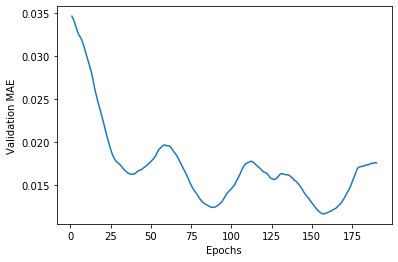

In [40]:
# This function is defined by Chollet in Deep Learning with Python book
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [46]:
np.random.seed(0)

best_cc_model = build_model(1e-3, 4, 256)
best_cc_model.fit(x_train,
             y_train,
             epochs=155,
             batch_size=64)
best_cc_model.evaluate(x_test, y_test)

Epoch 1/155
1595/1595 [==============================] - 0s 162us/step - loss: 0.0643 - mae: 0.1751
Epoch 2/155
1595/1595 [==============================] - 0s 88us/step - loss: 0.0195 - mae: 0.0952
Epoch 3/155
1595/1595 [==============================] - 0s 87us/step - loss: 0.0143 - mae: 0.0826
Epoch 4/155
1595/1595 [==============================] - 0s 90us/step - loss: 0.0115 - mae: 0.0724
Epoch 5/155
1595/1595 [==============================] - 0s 83us/step - loss: 0.0112 - mae: 0.0734
Epoch 6/155
1595/1595 [==============================] - 0s 84us/step - loss: 0.0094 - mae: 0.0652
Epoch 7/155
1595/1595 [==============================] - 0s 87us/step - loss: 0.0071 - mae: 0.0575
Epoch 8/155
1595/1595 [==============================] - 0s 82us/step - loss: 0.0058 - mae: 0.0527
Epoch 9/155
1595/1595 [==============================] - 0s 80us/step - loss: 0.0049 - mae: 0.0477
Epoch 10/155
1595/1595 [==============================] - 0s 91us/step - loss: 0.0034 - mae: 0.0407
Epoch 11

[0.02332261965182939, 0.10481840372085571]

#### l2 reguralization

In [49]:
np.random.seed(0)

l2_best_cc_model = Sequential()
l2_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu', input_shape=(122,)))
l2_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu'))
l2_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu'))
l2_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu'))
l2_best_cc_model.add(Dense(1))
l2_best_cc_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
l2_best_cc_model.fit(x_train, y_train, epochs=155, batch_size=64)
l2_best_cc_model.evaluate(x_test, y_test)

Epoch 1/155
1595/1595 [==============================] - 0s 212us/step - loss: 7.8418 - mae: 0.1761
Epoch 2/155
1595/1595 [==============================] - 0s 84us/step - loss: 4.7953 - mae: 0.0980
Epoch 3/155
1595/1595 [==============================] - 0s 87us/step - loss: 2.7545 - mae: 0.0954
Epoch 4/155
1595/1595 [==============================] - 0s 87us/step - loss: 1.5528 - mae: 0.0939
Epoch 5/155
1595/1595 [==============================] - 0s 89us/step - loss: 0.8816 - mae: 0.0939
Epoch 6/155
1595/1595 [==============================] - 0s 83us/step - loss: 0.5138 - mae: 0.0959
Epoch 7/155
1595/1595 [==============================] - 0s 92us/step - loss: 0.3121 - mae: 0.0950
Epoch 8/155
1595/1595 [==============================] - 0s 91us/step - loss: 0.1994 - mae: 0.0946
Epoch 9/155
1595/1595 [==============================] - 0s 82us/step - loss: 0.1349 - mae: 0.0940
Epoch 10/155
1595/1595 [==============================] - 0s 91us/step - loss: 0.0964 - mae: 0.0953
Epoch 11

Epoch 83/155
1595/1595 [==============================] - 0s 84us/step - loss: 0.0247 - mae: 0.0923
Epoch 84/155
1595/1595 [==============================] - 0s 80us/step - loss: 0.0259 - mae: 0.0988
Epoch 85/155
1595/1595 [==============================] - 0s 89us/step - loss: 0.0247 - mae: 0.0926
Epoch 86/155
1595/1595 [==============================] - 0s 85us/step - loss: 0.0252 - mae: 0.0934
Epoch 87/155
1595/1595 [==============================] - 0s 88us/step - loss: 0.0248 - mae: 0.0943
Epoch 88/155
1595/1595 [==============================] - 0s 88us/step - loss: 0.0252 - mae: 0.0942
Epoch 89/155
1595/1595 [==============================] - 0s 88us/step - loss: 0.0256 - mae: 0.0959
Epoch 90/155
1595/1595 [==============================] - 0s 83us/step - loss: 0.0254 - mae: 0.0971
Epoch 91/155
1595/1595 [==============================] - 0s 85us/step - loss: 0.0255 - mae: 0.0966
Epoch 92/155
1595/1595 [==============================] - 0s 81us/step - loss: 0.0245 - mae: 0.0923


[0.027849059001096806, 0.09790778160095215]

#### Dropout

In [53]:
np.random.seed(0)
do_best_cc_model = Sequential()
do_best_cc_model.add(Dense(256, activation='relu', input_shape=(122,)))
do_best_cc_model.add(Dropout(0.2))
do_best_cc_model.add(Dense(256, activation='relu'))
do_best_cc_model.add(Dropout(0.2))
do_best_cc_model.add(Dense(256, activation='relu'))
do_best_cc_model.add(Dropout(0.2))
do_best_cc_model.add(Dense(256, activation='relu'))
do_best_cc_model.add(Dropout(0.2))
do_best_cc_model.add(Dense(1))
do_best_cc_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
do_best_cc_model.fit(x_train, y_train, epochs=155, batch_size=64)
do_best_cc_model.evaluate(x_test, y_test)

Epoch 1/155
1595/1595 [==============================] - 0s 260us/step - loss: 0.0994 - mae: 0.2196
Epoch 2/155
1595/1595 [==============================] - 0s 96us/step - loss: 0.0327 - mae: 0.1308
Epoch 3/155
1595/1595 [==============================] - 0s 95us/step - loss: 0.0293 - mae: 0.1226
Epoch 4/155
1595/1595 [==============================] - 0s 101us/step - loss: 0.0275 - mae: 0.1186
Epoch 5/155
1595/1595 [==============================] - 0s 101us/step - loss: 0.0257 - mae: 0.1131
Epoch 6/155
1595/1595 [==============================] - 0s 93us/step - loss: 0.0230 - mae: 0.1076
Epoch 7/155
1595/1595 [==============================] - 0s 106us/step - loss: 0.0215 - mae: 0.1040
Epoch 8/155
1595/1595 [==============================] - 0s 92us/step - loss: 0.0209 - mae: 0.1011
Epoch 9/155
1595/1595 [==============================] - 0s 96us/step - loss: 0.0206 - mae: 0.1004
Epoch 10/155
1595/1595 [==============================] - 0s 91us/step - loss: 0.0195 - mae: 0.0988
Epoch

[0.02206332277142464, 0.10196860134601593]

#### l2 & dropout

In [55]:
np.random.seed(0)

l2_do_best_cc_model = Sequential()
l2_do_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu', input_shape=(122,)))
l2_do_best_cc_model.add(Dropout(0.3))
l2_do_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu'))
l2_do_best_cc_model.add(Dropout(0.3))
l2_do_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu'))
l2_do_best_cc_model.add(Dropout(0.3))
l2_do_best_cc_model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01),
                activation='relu'))
l2_do_best_cc_model.add(Dropout(0.3))
l2_do_best_cc_model.add(Dense(1))
l2_do_best_cc_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
l2_do_best_cc_model.fit(x_train, y_train, epochs=155, batch_size=64)
l2_do_best_cc_model.evaluate(x_test, y_test)

Epoch 1/155
1595/1595 [==============================] - 0s 272us/step - loss: 8.4119 - mae: 0.2671
Epoch 2/155
1595/1595 [==============================] - 0s 101us/step - loss: 6.0687 - mae: 0.1466
Epoch 3/155
1595/1595 [==============================] - 0s 97us/step - loss: 4.1710 - mae: 0.1207
Epoch 4/155
1595/1595 [==============================] - 0s 91us/step - loss: 2.7997 - mae: 0.1132
Epoch 5/155
1595/1595 [==============================] - 0s 100us/step - loss: 1.8586 - mae: 0.1045
Epoch 6/155
1595/1595 [==============================] - 0s 93us/step - loss: 1.2343 - mae: 0.1033
Epoch 7/155
1595/1595 [==============================] - 0s 100us/step - loss: 0.8247 - mae: 0.1047
Epoch 8/155
1595/1595 [==============================] - 0s 99us/step - loss: 0.5570 - mae: 0.1022
Epoch 9/155
1595/1595 [==============================] - 0s 94us/step - loss: 0.3828 - mae: 0.1029
Epoch 10/155
1595/1595 [==============================] - 0s 95us/step - loss: 0.2680 - mae: 0.1002
Epoch

[0.031360268676863576, 0.10480883717536926]

#### Save model and weights

In [56]:
l2_best_cc_model.save('keras_crime_trained_model.h5')

#### Score trained model

In [57]:
model = keras.models.load_model('keras_crime_trained_model.h5')
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test mse', scores[0])
print('Test mae', scores[1])

Test mse 0.027849059001096806
Test mae 0.09790778160095215
